In [15]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set()  # plot formatting
import pandas as pd
import numpy as np

In [ ]:
# 'Algorithm_Benchmark.csv' - unfiltered latest data set
# '0Algorithm_Benchmark.csv' - user filtered latest data set
# '1Algorithm_Benchmark.csv' - movie filtered latest data set
# '2Algorithm_Benchmark.csv' - both filtered latest data set


# 'SVD_parameter_search.csv' - unfiltered latest data set
# '0SVD_parameter_search.csv' - user filtered latest data set
# '1SVD_parameter_search.csv' - movie filtered latest data set
# '2SVD_parameter_search.csv' - both filtered latest data set


# 'SVD_SGD_momentum.csv' - unfiltered latest data set
# '0SVD_SGD_momentum.csv' - user filtered latest data set
# '1SVD_SGD_momentum.csv' - movie filtered latest data set
# '2SVD_SGD_momentum.csv' - both filtered latest data set
# 'SVDpp_SGD_momentum.csv' - unfiltered latest data set
# '0SVDpp_SGD_momentum.csv' - user filtered latest data set
# '1SVDpp_SGD_momentum.csv' - movie filtered latest data set
# '2SVDpp_SGD_momentum.csv' - both filtered latest data set

In [51]:
#this is the file with no prefix. no prefix means all of data without any filtering 
algo_benchmark_all_data = pd.read_csv("/root/big-data/Algorithm_Benchmark.csv") 
algo_benchmark_all_data = algo_benchmark_all_data.sort_values(by=['test_rmse'], ascending=False)
algo_benchmark_all_data

,Algorithm,test_rmse,test_mae,test_fcp,fit_time,test_time
12,NormalPredictor,1.149658,0.922202,0.490525,0.000489,0.001137
11,NMF,0.901280,0.704858,0.628378,0.029195,0.001160
10,CoClustering,0.893906,0.691875,0.622678,0.014759,0.001132
9,KNNWithZScore,0.860060,0.677801,0.597434,0.001111,0.005452
8,KNNBasic,0.844219,0.667598,0.647947,0.000205,0.004219
7,SlopeOne,0.836104,0.660286,0.602370,0.000895,0.009642
6,KNNWithMeans,0.826075,0.658256,0.607438,0.000702,0.008500
5,KNNBaseline,0.818162,0.648077,0.608993,0.001876,0.004974
4,SVD,0.778198,0.619687,0.590719,0.023875,0.013859
3,SVD_SGD_momentum,0.774928,0.622146,0.577952,0.198392,0.001456


In [53]:
#this is the file with no prefix. no prefix means all of data without any filtering 
algo_benchmark_small_data = pd.read_csv("/root/output_data_small/0Algorithm_Benchmark_small_user_filtered.csv") 
algo_benchmark_small_data = algo_benchmark_small_data.sort_values(by=['test_rmse'], ascending=False)
algo_benchmark_small_data

,Algorithm,test_rmse,test_mae,test_fcp,fit_time,test_time
12,NormalPredictor,1.287031,1.034568,0.505065,0.002067,0.007200
11,SVDpp_SGD_momentum,0.938603,0.788488,0.000000,850.830277,0.006436
10,SVD,0.934654,0.780228,0.000000,0.098759,0.005526
9,SVDpp,0.934351,0.786012,0.000000,41.823434,0.005907
8,CoClustering,0.933608,0.784008,0.000000,0.169394,0.005518
7,BaselineOnly,0.933473,0.783695,0.000000,0.005379,0.006896
6,NMF,0.933452,0.784052,0.000000,0.214225,0.006029
5,SlopeOne,0.933337,0.783967,0.000000,0.179527,0.006019
4,KNNWithMeans,0.933247,0.783681,0.000000,0.000428,0.018856
3,KNNBasic,0.933230,0.783743,0.000000,0.000256,0.006498


In [39]:
#this is the file with no prefix. no prefix means all of data without any filtering 
algo_benchmark_movie_filtered = pd.read_csv("/root/big-data/1Algorithm_Benchmark.csv") 
algo_benchmark_movie_filtered = algo_benchmark_movie_filtered.sort_values(by=['test_rmse'], ascending=False)
algo_benchmark_movie_filtered

,Algorithm,test_rmse,test_mae,test_fcp,fit_time,test_time
12,NormalPredictor,1.178326,0.909718,0.505954,0.002084,0.005266
11,NMF,1.012026,0.796212,0.527115,0.127984,0.005244
10,CoClustering,0.972234,0.724913,0.515430,0.058474,0.005420
9,SlopeOne,0.906438,0.662622,0.559272,0.005385,0.007731
8,KNNWithZScore,0.890197,0.662424,0.544067,0.031811,0.169681
7,KNNWithMeans,0.877642,0.657660,0.529778,0.016261,0.157922
6,KNNBasic,0.863990,0.652249,0.545878,0.011200,0.151516
5,SVD,0.863985,0.659914,0.527079,0.130038,0.007243
4,BaselineOnly,0.860972,0.660642,0.533140,0.002133,0.004411
3,SVD_SGD_momentum,0.858306,0.658174,0.536169,0.849518,0.006310


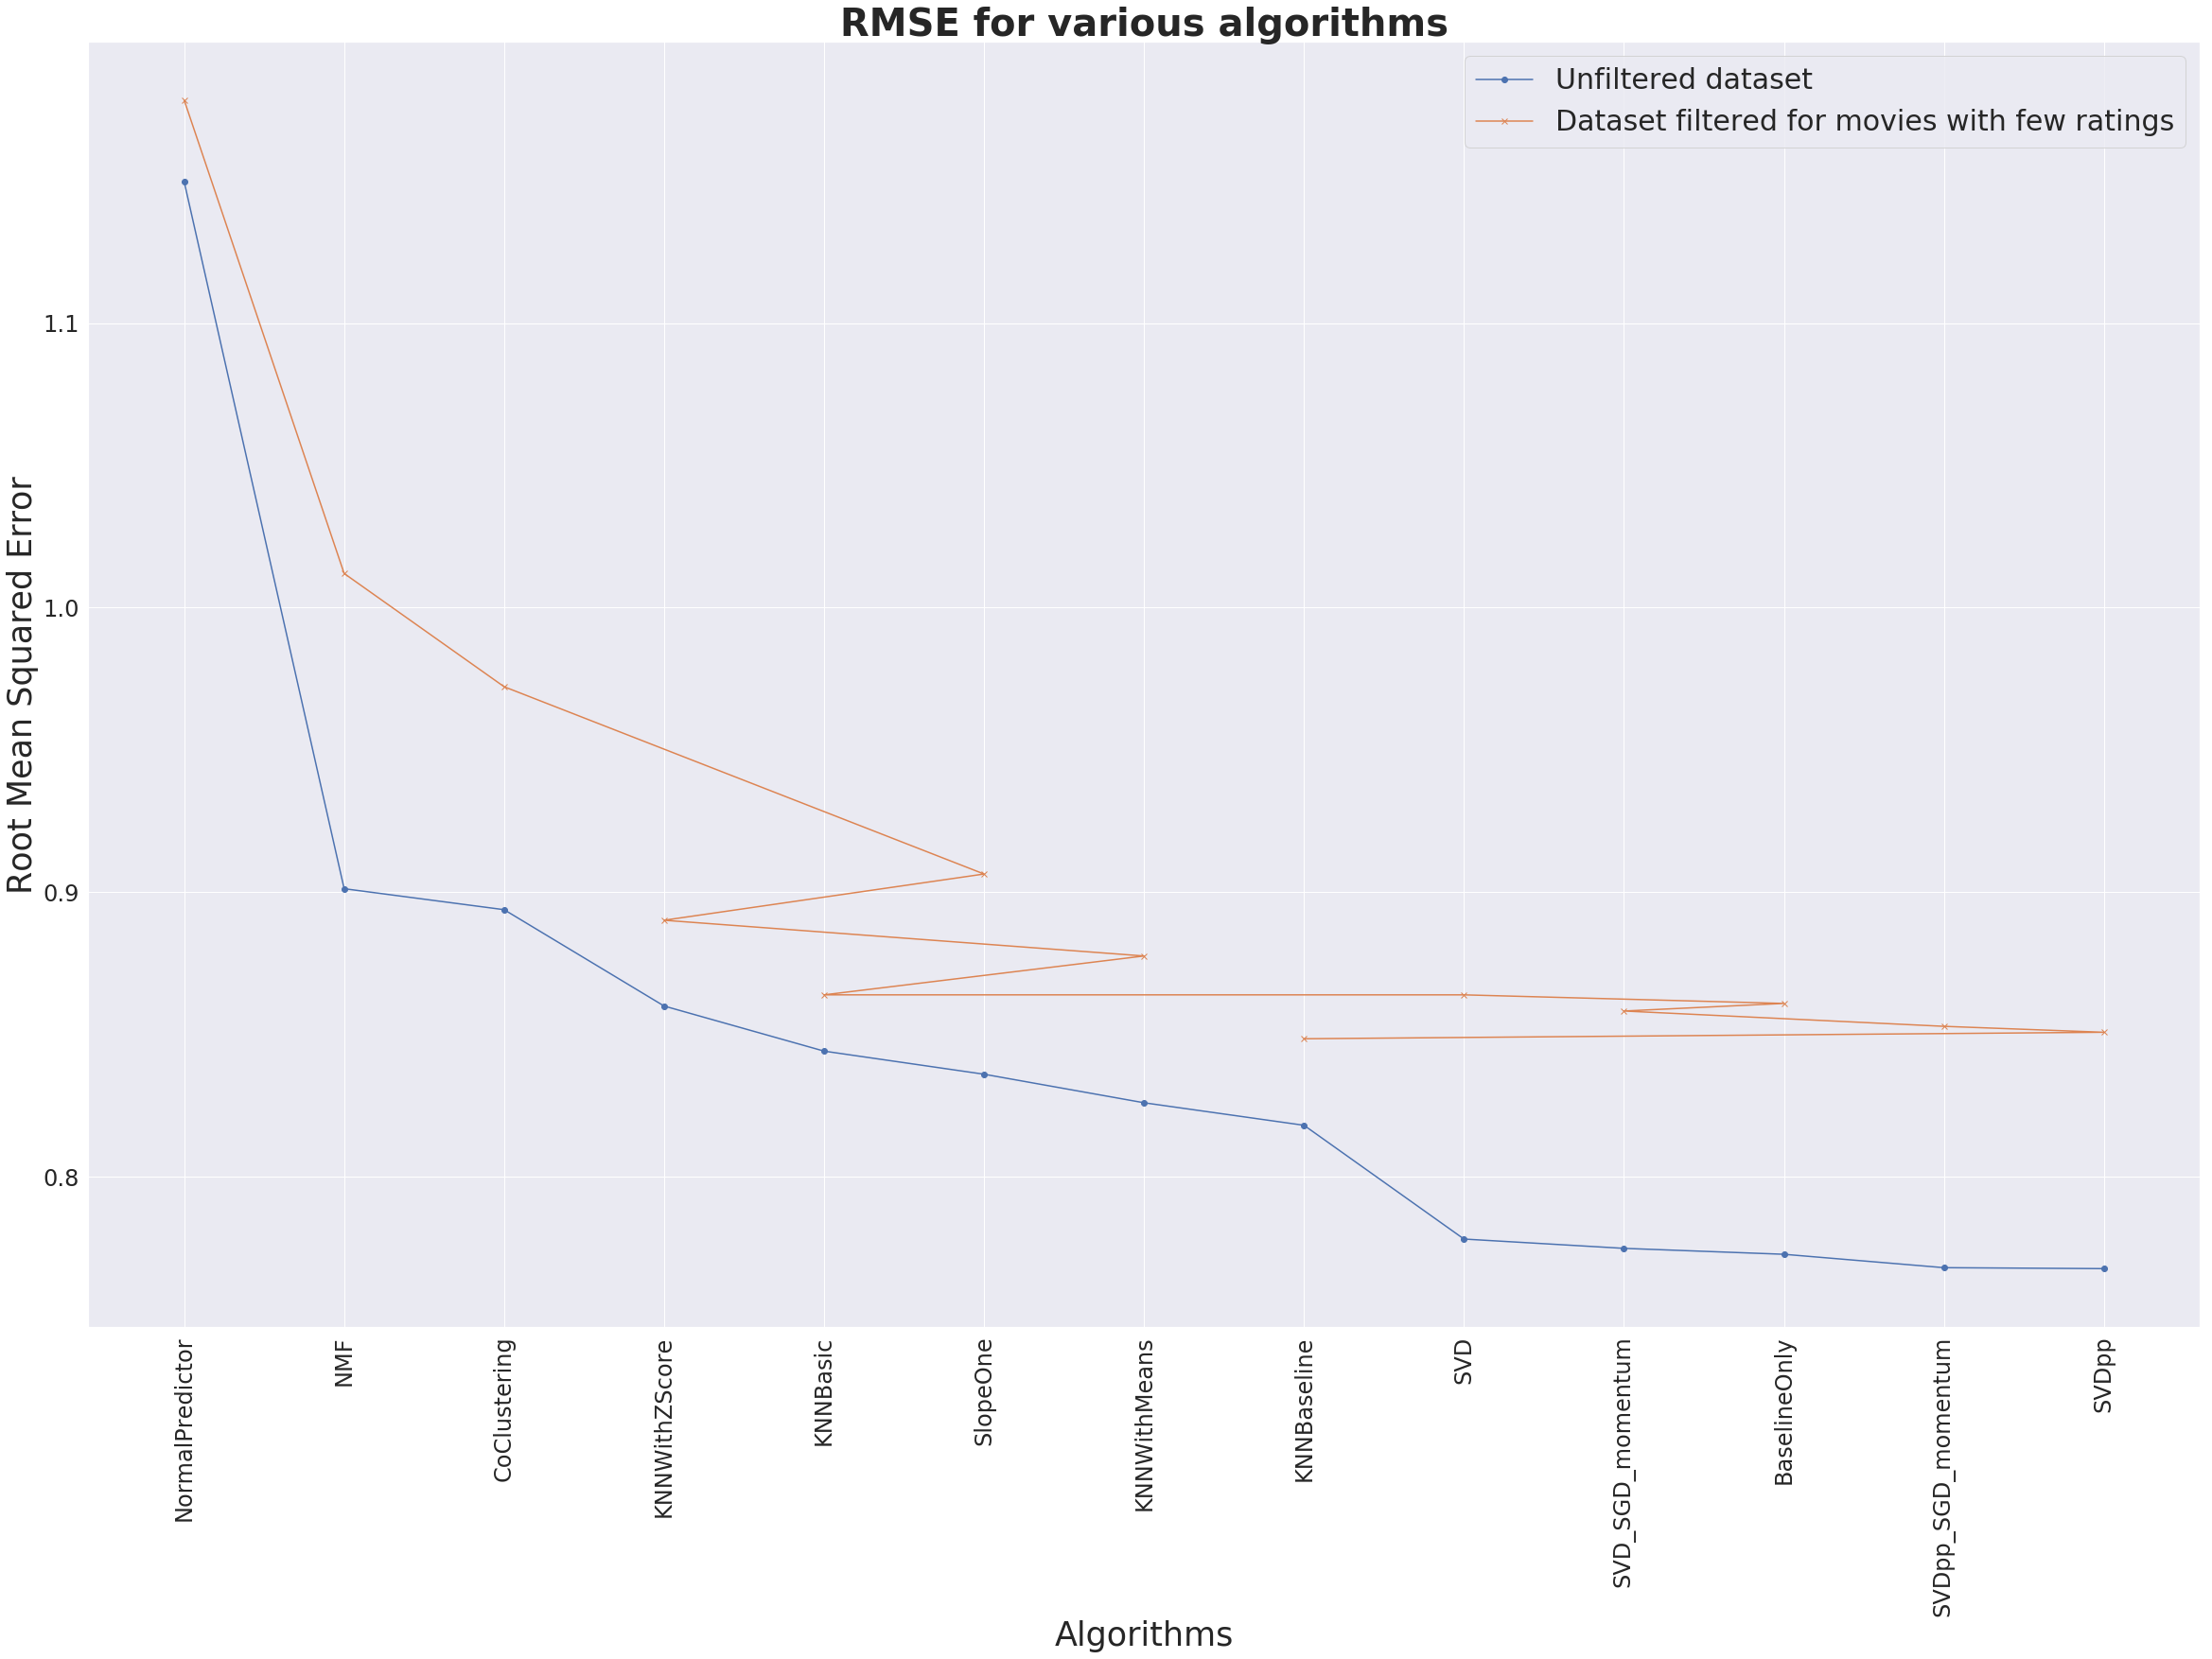

In [54]:
plt.rcParams["figure.figsize"] = (40,25)

plt.plot(algo_benchmark_all_data['Algorithm'], algo_benchmark_all_data['test_rmse'], '-o', label='Unfiltered dataset')
plt.plot(algo_benchmark_movie_filtered['Algorithm'], algo_benchmark_movie_filtered['test_rmse'], '-x', label='Dataset filtered for movies with few ratings')
#plt.axis([0.1,1.11,0.93,0.9375])
plt.title('RMSE for various algorithms',fontsize=40, fontweight='bold')
plt.xlabel("Algorithms", fontsize=35)
plt.ylabel("Root Mean Squared Error",fontsize=35)
plt.legend(loc="best", fontsize=30)
plt.xticks(fontsize=24, rotation=90)
plt.yticks(fontsize=24)
plt.show()



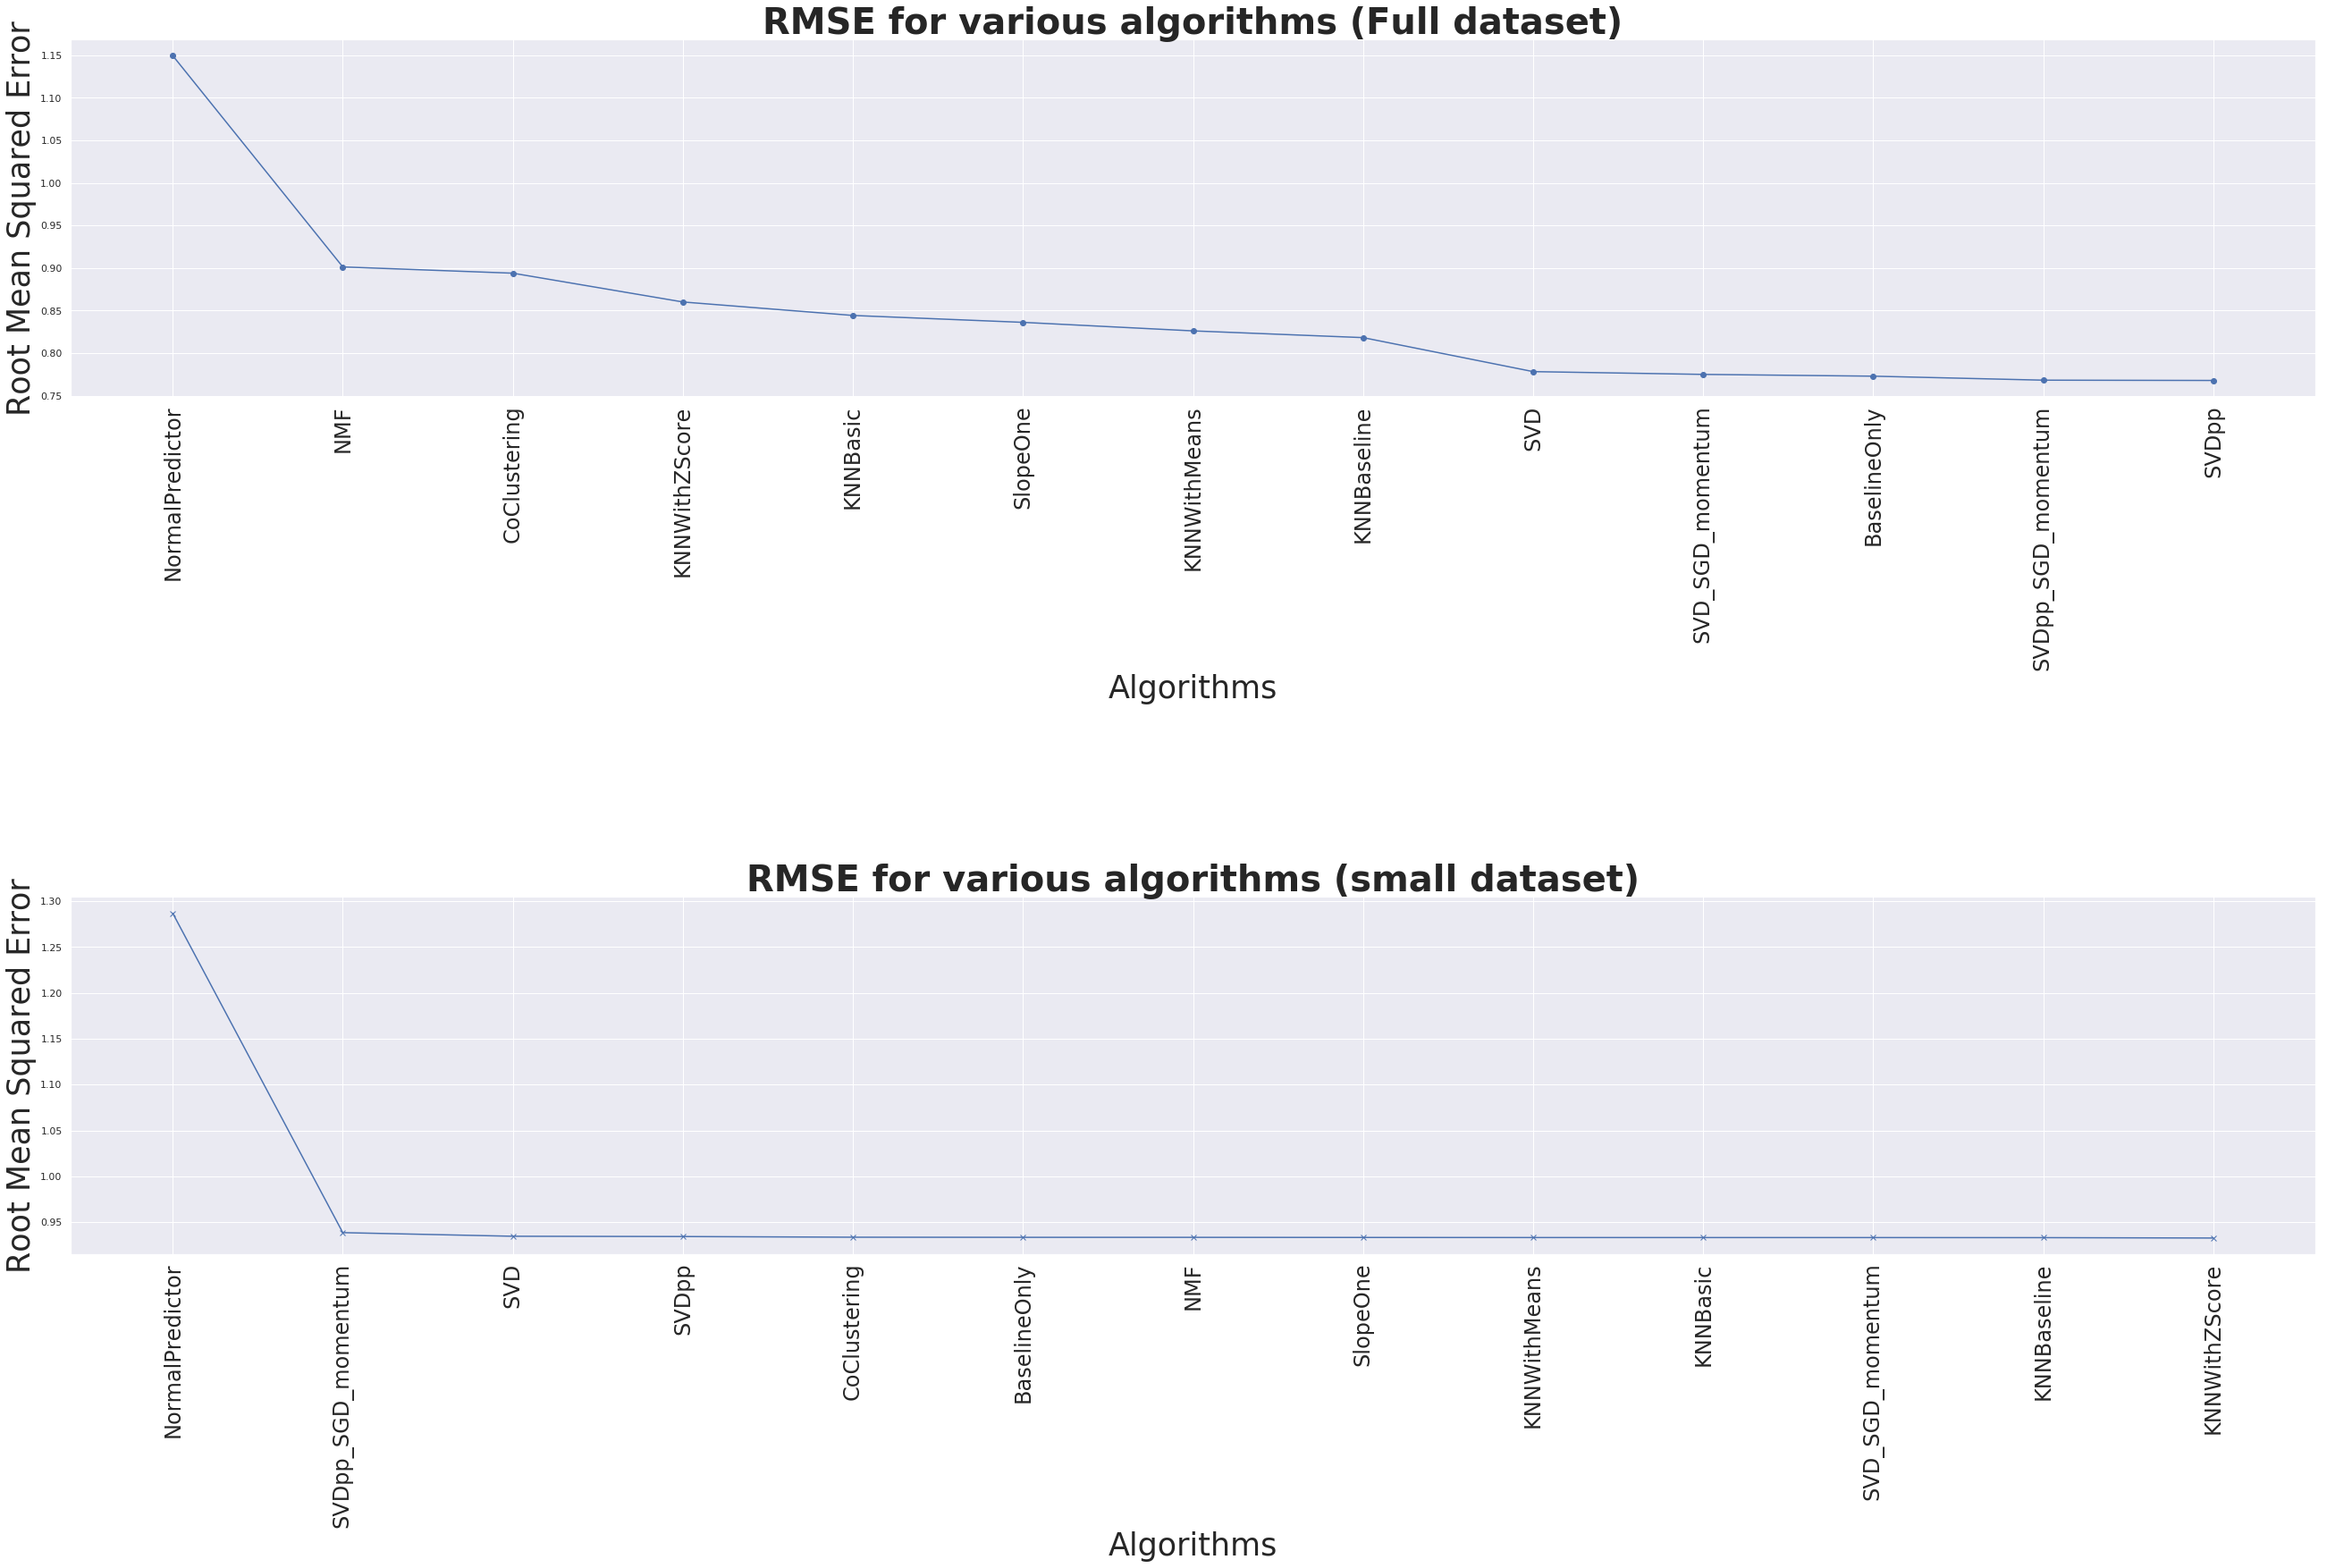

In [87]:
fig = plt.figure(1)
# equivalent but more general
ax1 = fig.add_subplot(311)
ax2 = fig.add_subplot(313)
ax1.plot(algo_benchmark_all_data['Algorithm'], algo_benchmark_all_data['test_rmse'], '-o')
plt.rcParams["figure.figsize"] = (45,25)
ax1.set_title('RMSE for various algorithms (Full dataset)',fontsize=40, fontweight='bold')
ax1.set_xlabel("Algorithms", fontsize=35)
ax1.set_ylabel("Root Mean Squared Error",fontsize=35)
ax1.set_xticklabels(algo_benchmark_all_data['Algorithm'], fontsize=24, rotation='vertical') 

ax2.plot(algo_benchmark_small_data['Algorithm'], algo_benchmark_small_data['test_rmse'], '-x')
ax2.set_title('RMSE for various algorithms (small dataset)',fontsize=40, fontweight='bold')
ax2.set_xlabel("Algorithms", fontsize=35)
ax2.set_ylabel("Root Mean Squared Error",fontsize=35)
ax2.set_xticklabels(algo_benchmark_small_data['Algorithm'], fontsize=24, rotation='vertical') 

plt.show()


In [125]:
# 'SVD_parameter_search.csv' - unfiltered latest data set
# '0SVD_parameter_search.csv' - user filtered latest data set
# '1SVD_parameter_search.csv' - movie filtered latest data set
# '2SVD_parameter_search.csv' - both filtered latest data set

svd_all_data = pd.read_csv("/root/big-data/SVD_parameter_search_.csv") 
svd_all_data = svd_all_data.sort_values(by=['mean_test_rmse'], ascending=False)
#svd_all_data.head()


svd_momentum_all_data = pd.read_csv("/root/big-data/SVD_SGD_momentum_parameter_search_.csv") 
svd_momentum_all_data = svd_momentum_all_data.sort_values(by=['mean_test_rmse'], ascending=False)
#svd_momentum_all_data.head()


svdpp_momentum_all_data = pd.read_csv("/root/big-data/SVDpp_SGD_momentum_parameter_search_.csv") 
svdpp_momentum_all_data = svdpp_momentum_all_data.sort_values(by=['mean_test_rmse'], ascending=False)
#svdpp_momentum_all_data.head()


In [126]:

# fix the other params constant and do one line for each of those combinations
# param_lr_all= 0.01, regularization_all = 0.6 and initial mean = 1.0 
print len(svd_all_data)
print len(svd_momentum_all_data)
print len(svdpp_momentum_all_data)

1584
1584
1584


In [ ]:
# This section filters for 
# 'param_lr_all']==0.01, param_init_mean']==1.0, 
# 'param_reg_all']==0.6 param_init_std_dev']==0.5]
#  so we can plot RMSE vs NumEpochs

In [119]:
svd_all_data_filtered = svd_all_data[svd_all_data['param_lr_all']==0.01]
print len(svd_all_data_filtered)
svd_momentum_all_data = svd_momentum_all_data[svd_momentum_all_data['param_lr_all']==0.01]
print len(svd_momentum_all_data)
svdpp_momentum_all_data = svdpp_momentum_all_data[svdpp_momentum_all_data['param_lr_all']==0.01]
print len(svdpp_momentum_all_data)
svd_all_data_filtered = svd_all_data_filtered[svd_all_data_filtered['param_init_mean']==1.0]
print len(svd_all_data_filtered)
svd_momentum_all_data = svd_momentum_all_data[svd_momentum_all_data['param_init_mean']==1.0]
print len(svd_momentum_all_data)
svdpp_momentum_all_data = svdpp_momentum_all_data[svdpp_momentum_all_data['param_init_mean']==1.0]
print len(svdpp_momentum_all_data)
svd_all_data_filtered = svd_all_data_filtered[svd_all_data_filtered['param_reg_all']==0.6]
print len(svd_all_data_filtered)
svd_momentum_all_data = svd_momentum_all_data[svd_momentum_all_data['param_reg_all']==0.6]
print len(svd_momentum_all_data)
svdpp_momentum_all_data = svdpp_momentum_all_data[svdpp_momentum_all_data['param_reg_all']==0.6]
print len(svdpp_momentum_all_data)
svd_all_data_filtered = svd_all_data_filtered[svd_all_data_filtered['param_init_std_dev']==0.5]
print len(svd_all_data_filtered)
svd_momentum_all_data = svd_momentum_all_data[svd_momentum_all_data['param_init_std_dev']==0.5]
print len(svd_momentum_all_data)
svdpp_momentum_all_data = svdpp_momentum_all_data[svdpp_momentum_all_data['param_init_std_dev']==0.5]
print len(svdpp_momentum_all_data)

396
396
396


In [123]:
svd_all_data_filtered=svd_all_data_filtered.sort_values(by=['mean_test_rmse'], ascending=False)
svd_momentum_all_data=svd_momentum_all_data.sort_values(by=['mean_test_rmse'], ascending=False)
svdpp_momentum_all_data=svdpp_momentum_all_data.sort_values(by=['mean_test_rmse'], ascending=False)


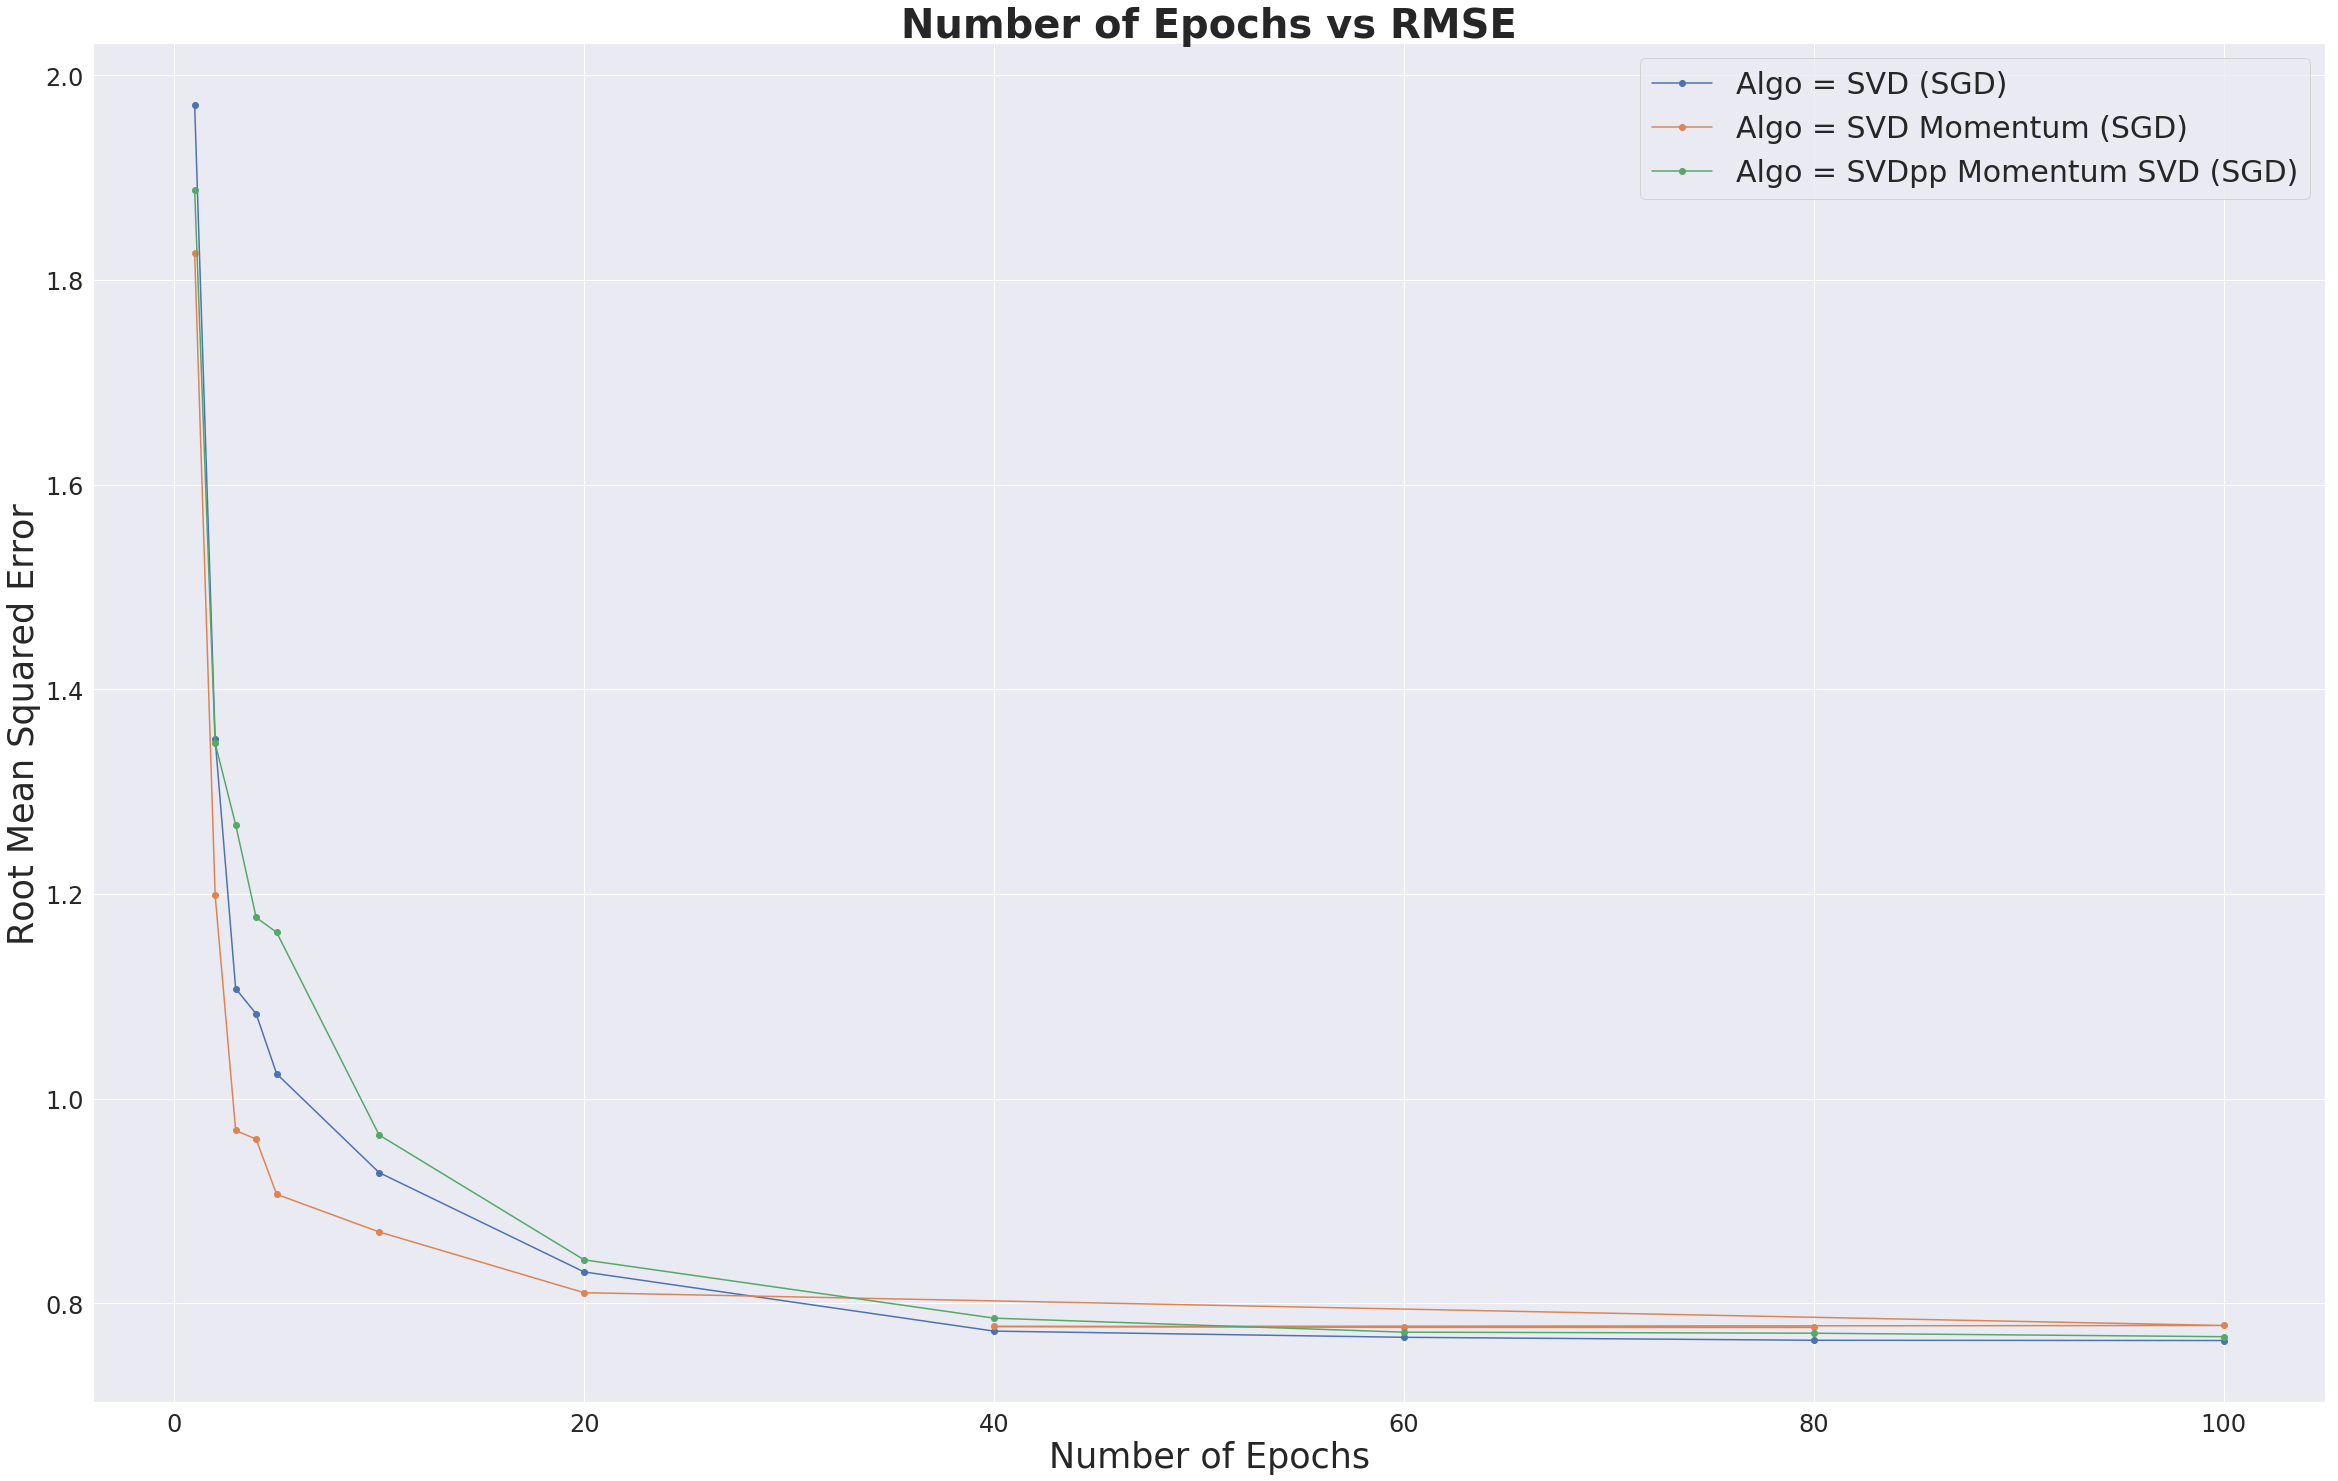

In [124]:

plt.rcParams["figure.figsize"] = (40,25)
plt.plot(svd_all_data_filtered['param_n_epochs'], svd_all_data_filtered['mean_test_rmse'], '-o', label='Algo = SVD (SGD)')
plt.plot(svd_momentum_all_data['param_n_epochs'], svd_momentum_all_data['mean_test_rmse'], '-o', label='Algo = SVD Momentum (SGD)')
plt.plot(svdpp_momentum_all_data['param_n_epochs'], svdpp_momentum_all_data['mean_test_rmse'], '-o', label='Algo = SVDpp Momentum SVD (SGD)')

plt.title('Number of Epochs vs RMSE',fontsize=40, fontweight='bold')
plt.xlabel("Number of Epochs", fontsize=35)
plt.ylabel("Root Mean Squared Error",fontsize=35)
plt.legend(loc="best", fontsize=30)
plt.xticks(fontsize=24)
plt.yticks(fontsize=24)
plt.show()

In [150]:
##Load again
svd_all_data = pd.read_csv("/root/big-data/SVD_parameter_search_.csv") 
svd_all_data = svd_all_data.sort_values(by=['mean_test_rmse'], ascending=False)

svd_momentum_all_data = pd.read_csv("/root/big-data/SVD_SGD_momentum_parameter_search_.csv") 
svd_momentum_all_data = svd_momentum_all_data.sort_values(by=['mean_test_rmse'], ascending=False)

svdpp_momentum_all_data = pd.read_csv("/root/big-data/SVDpp_SGD_momentum_parameter_search_.csv") 
svdpp_momentum_all_data = svdpp_momentum_all_data.sort_values(by=['mean_test_rmse'], ascending=False)

In [151]:
# This section filters for 
# param_n_epochs' = 100
#  param_init_mean']==1.0, 
# 'param_reg_all']==0.6 param_init_std_dev']==0.5]
# so we can plot RMSE vs NumEpochs
# so x-axis will be param_lr_all

svd_all_data_filtered = svd_all_data[svd_all_data['param_n_epochs']==100]
print len(svd_all_data_filtered)
svd_momentum_all_data = svd_momentum_all_data[svd_momentum_all_data['param_n_epochs']==100]
print len(svd_momentum_all_data)
svdpp_momentum_all_data = svdpp_momentum_all_data[svdpp_momentum_all_data['param_n_epochs']==100]
print len(svdpp_momentum_all_data)
svd_all_data_filtered = svd_all_data_filtered[svd_all_data_filtered['param_init_mean']==1.0]
print len(svd_all_data_filtered)
svd_momentum_all_data = svd_momentum_all_data[svd_momentum_all_data['param_init_mean']==1.0]
print len(svd_momentum_all_data)
svdpp_momentum_all_data = svdpp_momentum_all_data[svdpp_momentum_all_data['param_init_mean']==1.0]
print len(svdpp_momentum_all_data)
svd_all_data_filtered = svd_all_data_filtered[svd_all_data_filtered['param_init_std_dev']==0.5]
print len(svd_all_data_filtered)
svd_momentum_all_data = svd_momentum_all_data[svd_momentum_all_data['param_init_std_dev']==0.5]
print len(svd_momentum_all_data)
svdpp_momentum_all_data = svdpp_momentum_all_data[svdpp_momentum_all_data['param_init_std_dev']==0.5]
print len(svdpp_momentum_all_data)

144
144
144
48
48
48
12
12
12


In [152]:
svd_all_data_filtered=svd_all_data_filtered.sort_values(by=['mean_test_rmse'], ascending=False)
svd_momentum_all_data=svd_momentum_all_data.sort_values(by=['mean_test_rmse'], ascending=False)
svdpp_momentum_all_data=svdpp_momentum_all_data.sort_values(by=['mean_test_rmse'], ascending=False)

In [153]:
svd_all_data_filtered=svd_all_data_filtered.sort_values(by=['param_lr_all'], ascending=False)
svd_momentum_all_data=svd_momentum_all_data.sort_values(by=['param_lr_all'], ascending=False)
svdpp_momentum_all_data=svdpp_momentum_all_data.sort_values(by=['param_lr_all'], ascending=False)

In [154]:
"""fig = plt.figure(1)
# equivalent but more general
ax1 = fig.add_subplot(511)
ax2 = fig.add_subplot(513)
ax2 = fig.add_subplot(515)
"""
svd_all_data_filtered_1 = svd_all_data_filtered[svd_all_data_filtered['param_reg_all']==0.2]
print len(svd_all_data_filtered_1)
svd_momentum_all_data_1 = svd_momentum_all_data[svd_momentum_all_data['param_reg_all']==0.2]
print len(svd_momentum_all_data_1)
svdpp_momentum_all_data_1 = svdpp_momentum_all_data[svdpp_momentum_all_data['param_reg_all']==0.2]
print len(svdpp_momentum_all_data_1)


svd_all_data_filtered_2 = svd_all_data_filtered[svd_all_data_filtered['param_reg_all']==0.6]
print len(svd_all_data_filtered_2)
svd_momentum_all_data_2 = svd_momentum_all_data[svd_momentum_all_data['param_reg_all']==0.6]
print len(svd_momentum_all_data_2)
svdpp_momentum_all_data_2 = svdpp_momentum_all_data[svdpp_momentum_all_data['param_reg_all']==0.6]
print len(svdpp_momentum_all_data_2)


svd_all_data_filtered_3 = svd_all_data_filtered[svd_all_data_filtered['param_reg_all']==1.0]
print len(svd_all_data_filtered_3)
svd_momentum_all_data_3 = svd_momentum_all_data[svd_momentum_all_data['param_reg_all']==1.0]
print len(svd_momentum_all_data_3)
svdpp_momentum_all_data_3 = svdpp_momentum_all_data[svdpp_momentum_all_data['param_reg_all']==1.0]
print len(svdpp_momentum_all_data_3)



4
4
4
4
4
4
4
4
4


In [ ]:
"""

ax1.plot(svd_all_data_filtered_1['param_lr_all'], svd_all_data_filtered_1['mean_test_rmse'], '-o', label='Algo: SVD, Reg=0.6')
ax1.plot(svd_momentum_all_data_1['param_lr_all'], svd_momentum_all_data_1['mean_test_rmse'], '-o', label='Algo: SVD Momentum, Reg=0.6')
ax1.plot(svdpp_momentum_all_data_1['param_lr_all'], svdpp_momentum_all_data_1['mean_test_rmse'], '-o', label='Algo: SVDpp Momentum, Reg=0.6')

ax1.set_title('Learning Rate vs RMSE for various algorithms, Regularization Rate)',fontsize=40, fontweight='bold')
ax1.set_xlabel("Learning Rate", fontsize=35)
ax1.set_ylabel("Root Mean Squared Error",fontsize=35)
ax1.set_xticklabels(svdpp_momentum_all_data_1['param_lr_all'], fontsize=24) 

plt.show()
"""

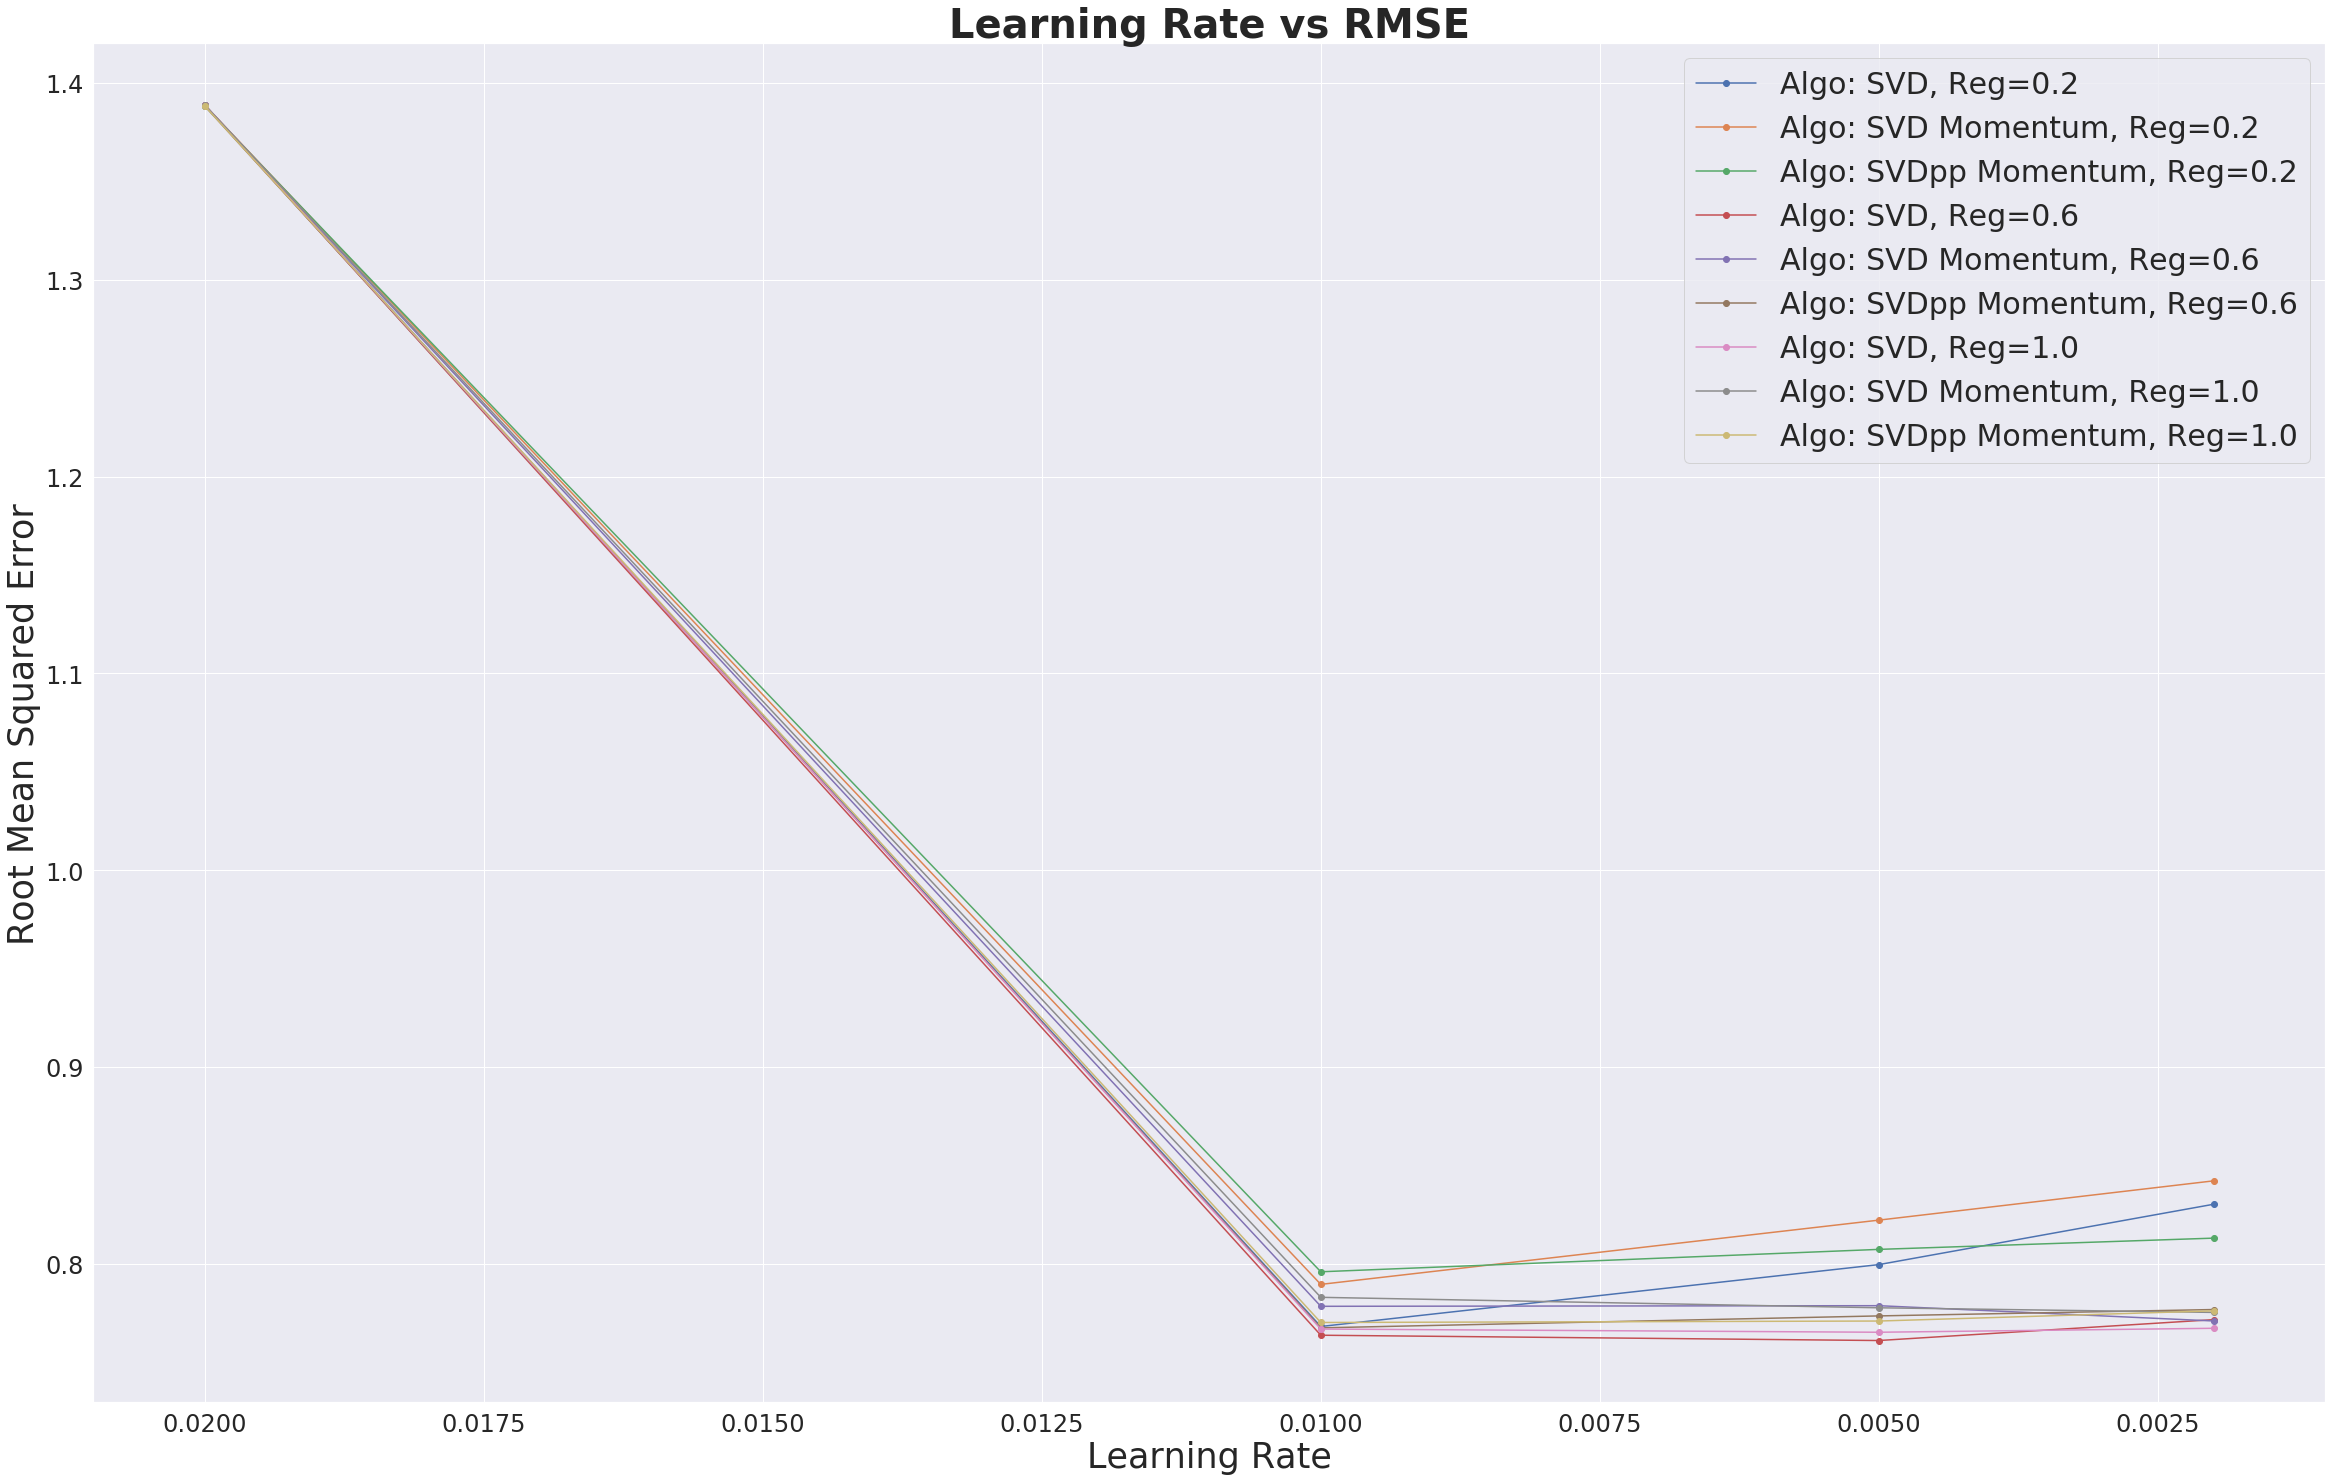

In [155]:
plt.rcParams["figure.figsize"] = (40,25)
plt.plot(svd_all_data_filtered_1['param_lr_all'], svd_all_data_filtered_1['mean_test_rmse'], '-o', label='Algo: SVD, Reg=0.2')
plt.plot(svd_momentum_all_data_1['param_lr_all'], svd_momentum_all_data_1['mean_test_rmse'], '-o', label='Algo: SVD Momentum, Reg=0.2')
plt.plot(svdpp_momentum_all_data_1['param_lr_all'], svdpp_momentum_all_data_1['mean_test_rmse'], '-o', label='Algo: SVDpp Momentum, Reg=0.2')

plt.plot(svd_all_data_filtered_2['param_lr_all'], svd_all_data_filtered_2['mean_test_rmse'], '-o', label='Algo: SVD, Reg=0.6')
plt.plot(svd_momentum_all_data_2['param_lr_all'], svd_momentum_all_data_2['mean_test_rmse'], '-o', label='Algo: SVD Momentum, Reg=0.6')
plt.plot(svdpp_momentum_all_data_2['param_lr_all'], svdpp_momentum_all_data_2['mean_test_rmse'], '-o', label='Algo: SVDpp Momentum, Reg=0.6')


plt.plot(svd_all_data_filtered_3['param_lr_all'], svd_all_data_filtered_3['mean_test_rmse'], '-o', label='Algo: SVD, Reg=1.0')
plt.plot(svd_momentum_all_data_3['param_lr_all'], svd_momentum_all_data_3['mean_test_rmse'], '-o', label='Algo: SVD Momentum, Reg=1.0')
plt.plot(svdpp_momentum_all_data_3['param_lr_all'], svdpp_momentum_all_data_3['mean_test_rmse'], '-o', label='Algo: SVDpp Momentum, Reg=1.0')

plt.title('Learning Rate vs RMSE',fontsize=40, fontweight='bold')
plt.xlabel("Learning Rate", fontsize=35)
plt.ylabel("Root Mean Squared Error",fontsize=35)
plt.legend(loc="best", fontsize=30)
plt.xticks(fontsize=24)
plt.yticks(fontsize=24)
plt.xlim(0.021, 0.001)  
plt.show()

In [156]:
##Load again
svd_all_data = pd.read_csv("/root/big-data/SVD_parameter_search_.csv") 
svd_all_data = svd_all_data.sort_values(by=['mean_test_rmse'], ascending=False)

svd_momentum_all_data = pd.read_csv("/root/big-data/SVD_SGD_momentum_parameter_search_.csv") 
svd_momentum_all_data = svd_momentum_all_data.sort_values(by=['mean_test_rmse'], ascending=False)

svdpp_momentum_all_data = pd.read_csv("/root/big-data/SVDpp_SGD_momentum_parameter_search_.csv") 
svdpp_momentum_all_data = svdpp_momentum_all_data.sort_values(by=['mean_test_rmse'], ascending=False)

In [157]:
# This section filters for 
# param_n_epochs' = 100, 
# 'param_reg_all']==0.6] and lr= 0.01
# so we can plot RMSE vs NumEpochs
# so x-axis will be param_lr_all

svd_all_data_filtered = svd_all_data[svd_all_data['param_n_epochs']==100]
print len(svd_all_data_filtered)
svd_momentum_all_data = svd_momentum_all_data[svd_momentum_all_data['param_n_epochs']==100]
print len(svd_momentum_all_data)
svdpp_momentum_all_data = svdpp_momentum_all_data[svdpp_momentum_all_data['param_n_epochs']==100]
print len(svdpp_momentum_all_data)


svd_all_data_filtered = svd_all_data_filtered[svd_all_data_filtered['param_lr_all']==0.01]
print len(svd_all_data_filtered)
svd_momentum_all_data = svd_momentum_all_data[svd_momentum_all_data['param_lr_all']==0.01]
print len(svd_momentum_all_data)
svdpp_momentum_all_data = svdpp_momentum_all_data[svdpp_momentum_all_data['param_lr_all']==0.01]
print len(svdpp_momentum_all_data)

svd_all_data_filtered = svd_all_data_filtered[svd_all_data_filtered['param_reg_all']==0.6]
print len(svd_all_data_filtered)
svd_momentum_all_data = svd_momentum_all_data[svd_momentum_all_data['param_reg_all']==0.6]
print len(svd_momentum_all_data)
svdpp_momentum_all_data = svdpp_momentum_all_data[svdpp_momentum_all_data['param_reg_all']==0.6]
print len(svdpp_momentum_all_data)

144
144
144
36
36
36
12
12
12


In [158]:
svd_all_data_filtered=svd_all_data_filtered.sort_values(by=['mean_test_rmse'], ascending=False)
svd_momentum_all_data=svd_momentum_all_data.sort_values(by=['mean_test_rmse'], ascending=False)
svdpp_momentum_all_data=svdpp_momentum_all_data.sort_values(by=['mean_test_rmse'], ascending=False)

svd_all_data_filtered=svd_all_data_filtered.sort_values(by=['param_init_mean'], ascending=False)
svd_momentum_all_data=svd_momentum_all_data.sort_values(by=['param_init_mean'], ascending=False)
svdpp_momentum_all_data=svdpp_momentum_all_data.sort_values(by=['param_init_mean'], ascending=False)

In [159]:
svd_all_data_filtered_1 = svd_all_data_filtered[svd_all_data_filtered['param_init_std_dev']==0.0]
print len(svd_all_data_filtered_1)
svd_momentum_all_data_1 = svd_momentum_all_data[svd_momentum_all_data['param_init_std_dev']==0.0]
print len(svd_momentum_all_data_1)
svdpp_momentum_all_data_1 = svdpp_momentum_all_data[svdpp_momentum_all_data['param_init_std_dev']==0.0]
print len(svdpp_momentum_all_data_1)


svd_all_data_filtered_2 = svd_all_data_filtered[svd_all_data_filtered['param_init_std_dev']==0.1]
print len(svd_all_data_filtered_2)
svd_momentum_all_data_2 = svd_momentum_all_data[svd_momentum_all_data['param_init_std_dev']==0.1]
print len(svd_momentum_all_data_2)
svdpp_momentum_all_data_2 = svdpp_momentum_all_data[svdpp_momentum_all_data['param_init_std_dev']==0.1]
print len(svdpp_momentum_all_data_2)


svd_all_data_filtered_3 = svd_all_data_filtered[svd_all_data_filtered['param_init_std_dev']==0.5]
print len(svd_all_data_filtered_3)
svd_momentum_all_data_3 = svd_momentum_all_data[svd_momentum_all_data['param_init_std_dev']==0.5]
print len(svd_momentum_all_data_3)
svdpp_momentum_all_data_3 = svdpp_momentum_all_data[svdpp_momentum_all_data['param_init_std_dev']==0.5]
print len(svdpp_momentum_all_data_3)

svd_all_data_filtered_4 = svd_all_data_filtered[svd_all_data_filtered['param_init_std_dev']==1.0]
print len(svd_all_data_filtered_4)
svd_momentum_all_data_4 = svd_momentum_all_data[svd_momentum_all_data['param_init_std_dev']==1.0]
print len(svd_momentum_all_data_4)
svdpp_momentum_all_data_4 = svdpp_momentum_all_data[svdpp_momentum_all_data['param_init_std_dev']==1.0]
print len(svdpp_momentum_all_data_4)

3
3
3
3
3
3
3
3
3
3
3
3


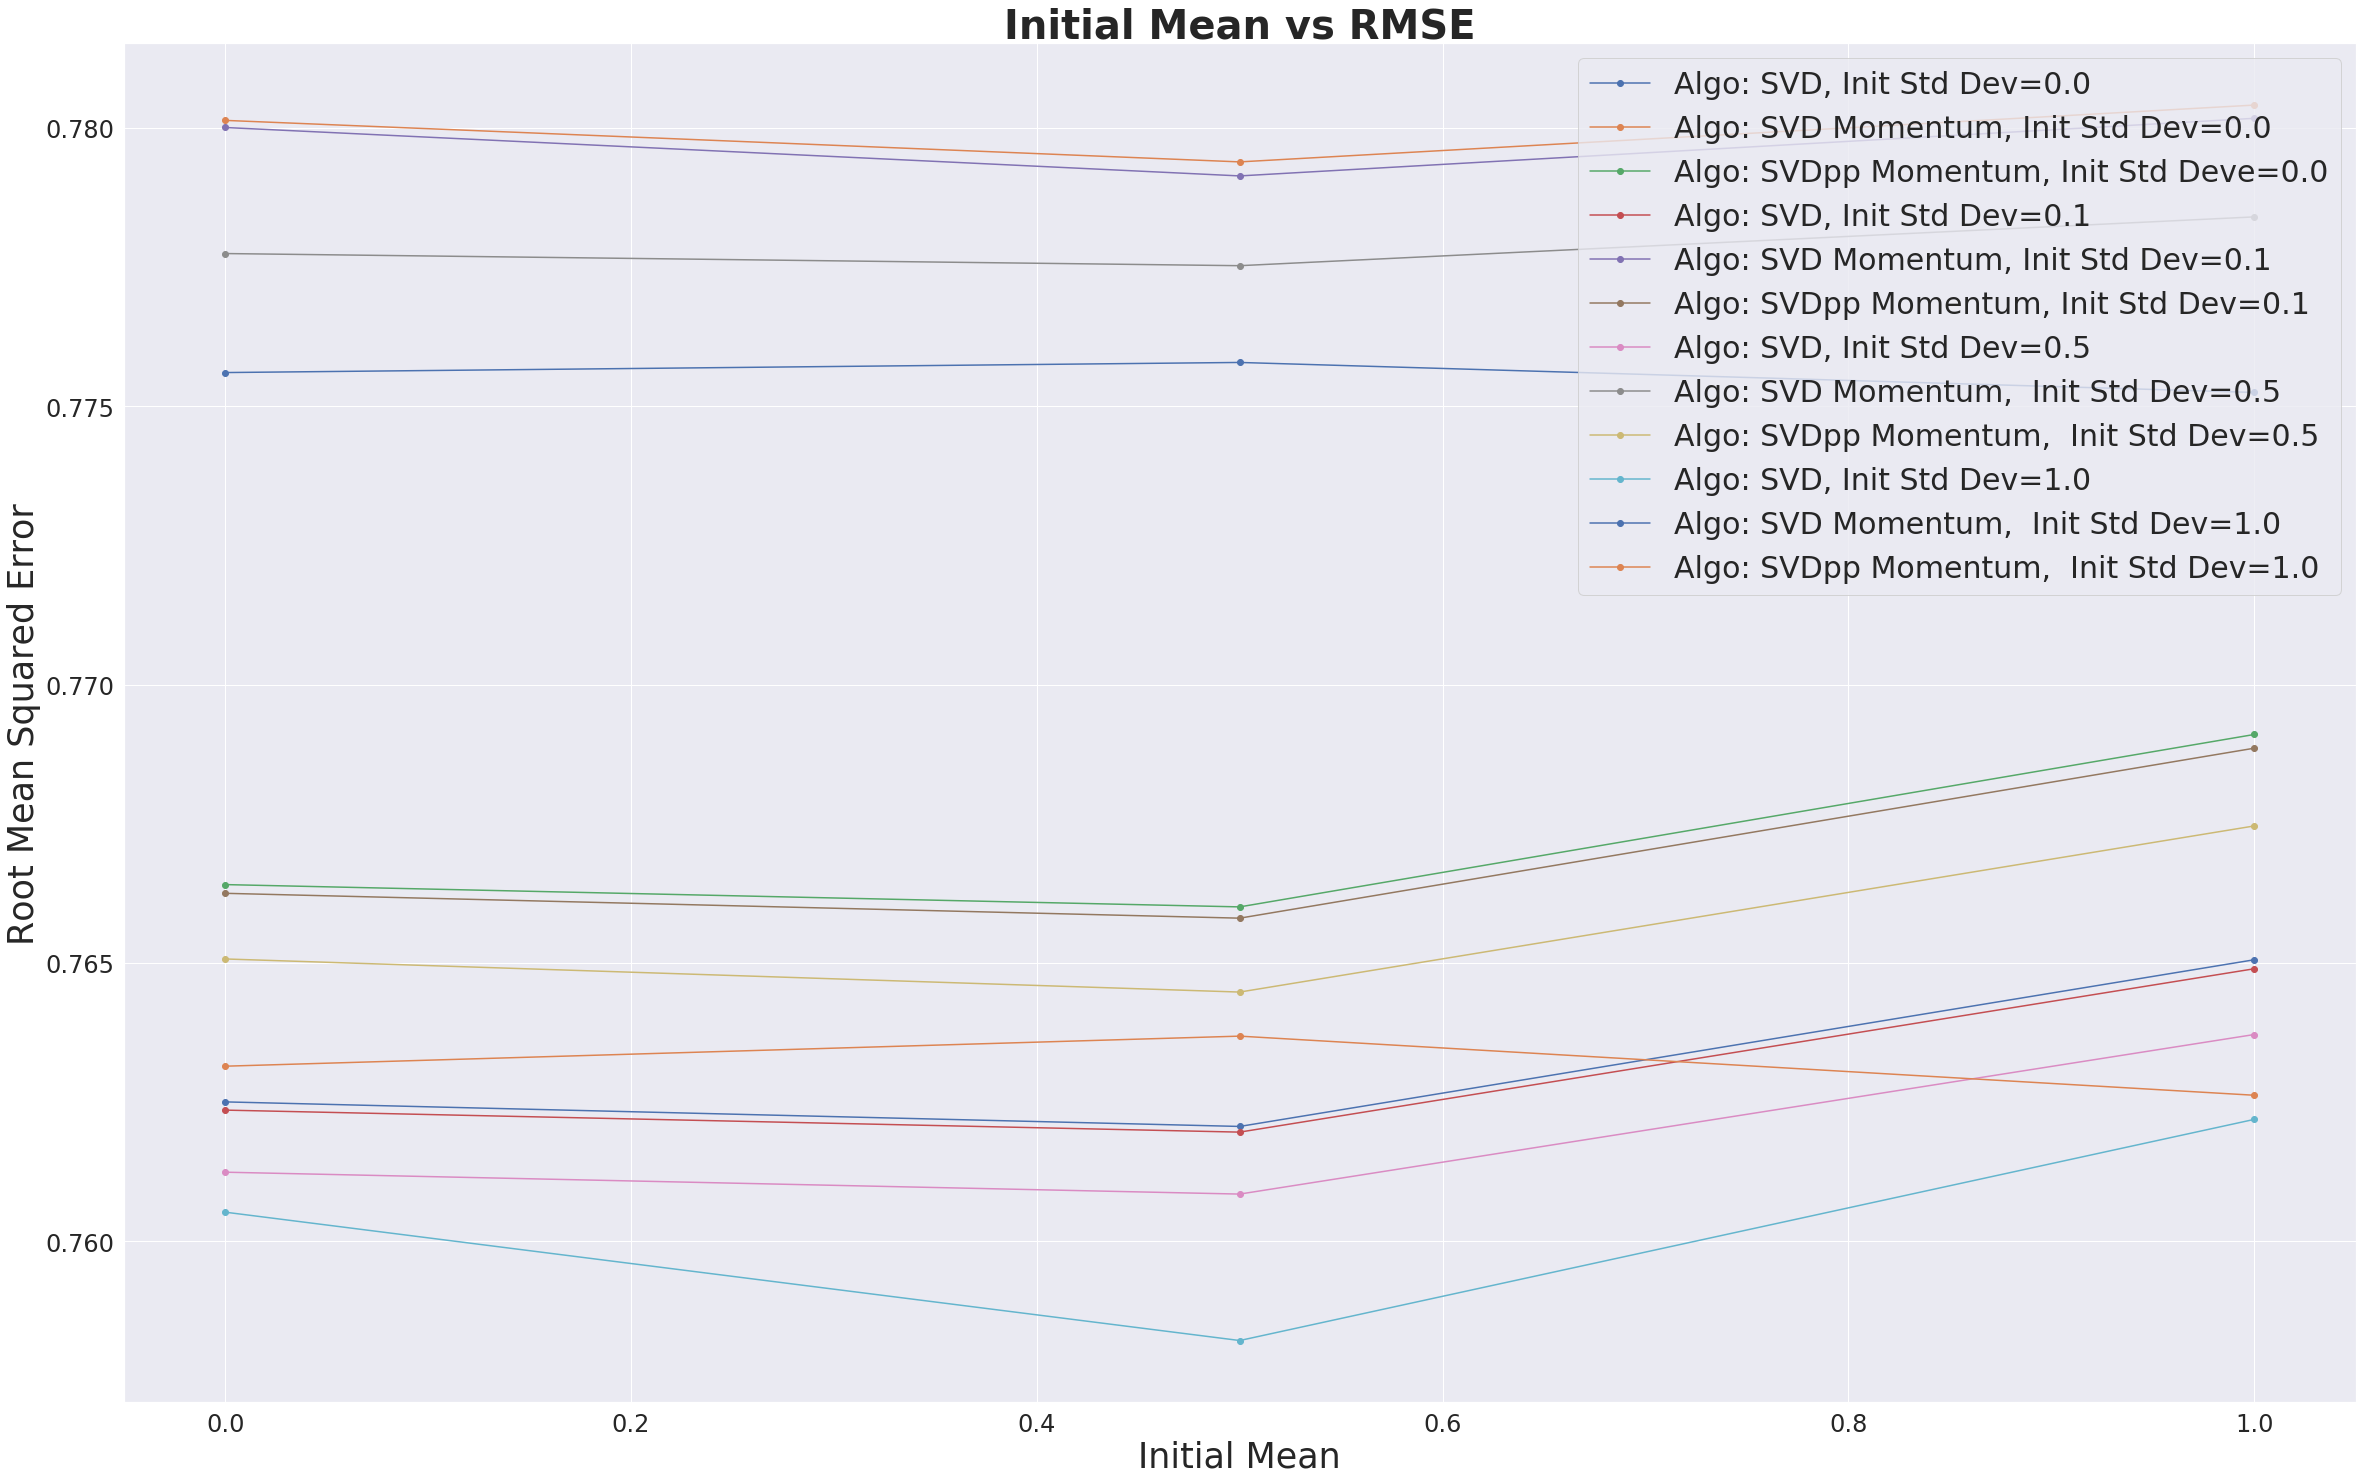

In [167]:
plt.rcParams["figure.figsize"] = (40,25)
plt.plot(svd_all_data_filtered_1['param_init_mean'], svd_all_data_filtered_1['mean_test_rmse'], '-o', label='Algo: SVD, Init Std Dev=0.0')
plt.plot(svd_momentum_all_data_1['param_init_mean'], svd_momentum_all_data_1['mean_test_rmse'], '-o', label='Algo: SVD Momentum, Init Std Dev=0.0')
plt.plot(svdpp_momentum_all_data_1['param_init_mean'], svdpp_momentum_all_data_1['mean_test_rmse'], '-o', label='Algo: SVDpp Momentum, Init Std Deve=0.0')

plt.plot(svd_all_data_filtered_2['param_init_mean'], svd_all_data_filtered_2['mean_test_rmse'], '-o', label='Algo: SVD, Init Std Dev=0.1')
plt.plot(svd_momentum_all_data_2['param_init_mean'], svd_momentum_all_data_2['mean_test_rmse'], '-o', label='Algo: SVD Momentum, Init Std Dev=0.1')
plt.plot(svdpp_momentum_all_data_2['param_init_mean'], svdpp_momentum_all_data_2['mean_test_rmse'], '-o', label='Algo: SVDpp Momentum, Init Std Dev=0.1')


plt.plot(svd_all_data_filtered_3['param_init_mean'], svd_all_data_filtered_3['mean_test_rmse'], '-o', label='Algo: SVD, Init Std Dev=0.5')
plt.plot(svd_momentum_all_data_3['param_init_mean'], svd_momentum_all_data_3['mean_test_rmse'], '-o', label='Algo: SVD Momentum,  Init Std Dev=0.5')
plt.plot(svdpp_momentum_all_data_3['param_init_mean'], svdpp_momentum_all_data_3['mean_test_rmse'], '-o', label='Algo: SVDpp Momentum,  Init Std Dev=0.5')

plt.plot(svd_all_data_filtered_4['param_init_mean'], svd_all_data_filtered_4['mean_test_rmse'], '-o', label='Algo: SVD, Init Std Dev=1.0')
plt.plot(svd_momentum_all_data_4['param_init_mean'], svd_momentum_all_data_4['mean_test_rmse'], '-o', label='Algo: SVD Momentum,  Init Std Dev=1.0')
plt.plot(svdpp_momentum_all_data_4['param_init_mean'], svdpp_momentum_all_data_4['mean_test_rmse'], '-o', label='Algo: SVDpp Momentum,  Init Std Dev=1.0')

plt.title('Initial Mean vs RMSE',fontsize=40, fontweight='bold')
plt.xlabel("Initial Mean", fontsize=35)
plt.ylabel("Root Mean Squared Error",fontsize=35)
plt.legend(loc="upper right", fontsize=30)
plt.xticks(fontsize=24)
plt.yticks(fontsize=24)
#plt.xlim(0.021, 0.001)  
plt.show()